In [78]:
%load_ext autoreload
%autoreload 2

import numpy as np
from gp_backend import GPInterface,GPAggregate
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
class dataGP(GPInterface):
    def __init__(self, X : np.array,Y : np.array,K:callable):
        self.X = X
        self.Y=Y
        self.K=K
        self._nugget=1e-10
        self.optimal_parameter=None
        self._z=Y
    
    def set_kernel(self,k:callable)->None:
        del self.K_mat
        self.K=k
    
    def get_kmat(self):
        res=np.array([[self.K(x1,x2) for x2 in self.X] for x1 in self.X])
        return res+self._nugget*np.eye(self.X.shape[0])

    
    def kvec(self,x):
        return np.array([self.K(x,x1) for x1 in self.X])
    
    def mat_covariance(self,model):
        res=np.array([[self.K(x1,x2) for x2 in model.X] for x1 in self.X])
        return res

    
    def fit(self,alpha_schedule,w_init=None):
        pass

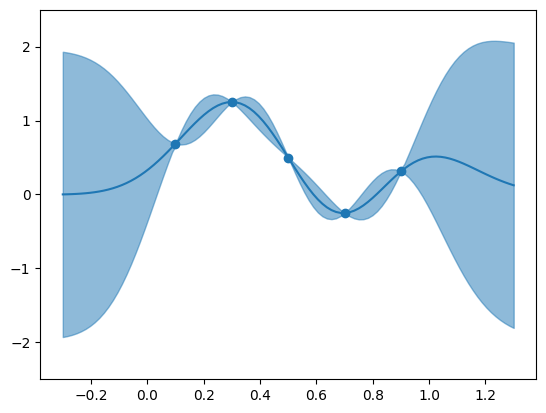

In [80]:
X=np.array([0.1,0.3,0.5,0.7,0.9])
f_test=lambda x: np.sin(2*np.pi*x)+x
Y=f_test(X)
model=dataGP(X,Y,lambda x,y:np.exp(-12.5*np.linalg.norm(x-y)**2))
plt.scatter(X,Y)
x_plot=np.linspace(-0.3,1.3,100)
plt.plot(x_plot,[model(x) for x in x_plot])
yerr0=[model(x)-1.96*np.sqrt(model.variance(x)) for x in x_plot]
yerr1=[model(x)+1.96*np.sqrt(model.variance(x)) for x in x_plot]
plt.fill_between(x_plot, yerr0, yerr1, color='C0', alpha=0.5)
plt.ylim([-2.5,2.5])
plt.show()

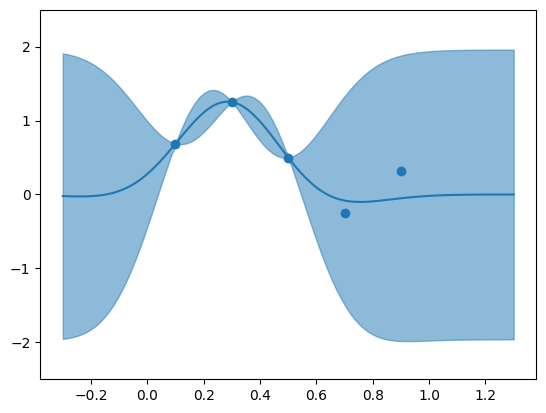

In [81]:
left=dataGP(X[:3],Y[:3],lambda x,y:np.exp(-12.5*np.linalg.norm(x-y)**2))
plt.scatter(X,Y)
x_plot=np.linspace(-0.3,1.3,100)
plt.plot(x_plot,[left(x) for x in x_plot])
yerr0=[left(x)-1.96*np.sqrt(left.variance(x)) for x in x_plot]
yerr1=[left(x)+1.96*np.sqrt(left.variance(x)) for x in x_plot]
plt.fill_between(x_plot, yerr0, yerr1, color='C0', alpha=0.5)
plt.ylim([-2.5,2.5])
plt.show()

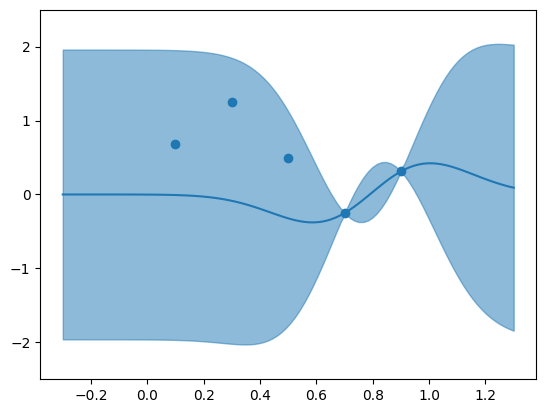

In [82]:
right=dataGP(X[3:],Y[3:],lambda x,y:np.exp(-12.5*np.linalg.norm(x-y)**2))
plt.scatter(X,Y)
x_plot=np.linspace(-0.3,1.3,100)
plt.plot(x_plot,[right(x) for x in x_plot])
yerr0=[right(x)-1.96*np.sqrt(right.variance(x)) for x in x_plot]
yerr1=[right(x)+1.96*np.sqrt(right.variance(x)) for x in x_plot]
plt.fill_between(x_plot, yerr0, yerr1, color='C0', alpha=0.5)
plt.ylim([-2.5,2.5])
plt.show()

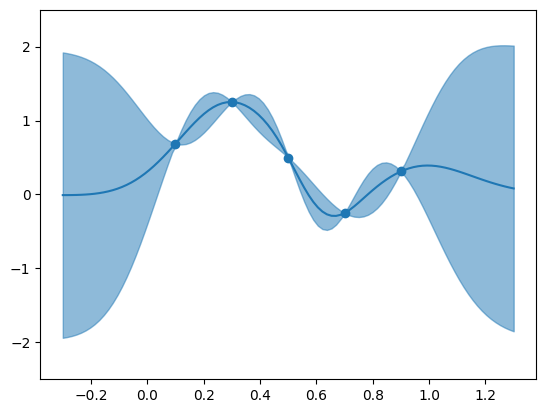

In [83]:
aggregate=GPAggregate([left,right])

plt.scatter(X,Y)
x_plot=np.linspace(-0.3,1.3,100)
plt.plot(x_plot,[aggregate(x) for x in x_plot])
yerr0=[aggregate(x)-1.96*np.sqrt(aggregate.variance(x)) for x in x_plot]
yerr1=[aggregate(x)+1.96*np.sqrt(aggregate.variance(x)) for x in x_plot]
plt.fill_between(x_plot, yerr0, yerr1, color='C0', alpha=0.5)
plt.ylim([-2.5,2.5])
plt.show()

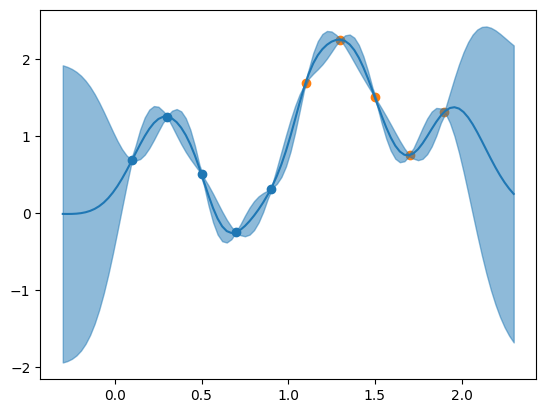

In [88]:
X_2=np.array([0.1,0.3,0.5,0.7,0.9])+1
Y_2=f_test(X_2)
other=dataGP(X_2,Y_2,lambda x,y:np.exp(-12.5*np.linalg.norm(x-y)**2))
super_aggregate=GPAggregate([aggregate,other])
plt.scatter(X,Y)
plt.scatter(X_2,Y_2)
x_plot=np.linspace(-0.3,2.3,100)
plt.plot(x_plot,[super_aggregate(x) for x in x_plot])
yerr0=[super_aggregate(x)-1.96*np.sqrt(super_aggregate.variance(x)) for x in x_plot]
yerr1=[super_aggregate(x)+1.96*np.sqrt(super_aggregate.variance(x)) for x in x_plot]
plt.fill_between(x_plot, yerr0, yerr1, color='C0', alpha=0.5)
#plt.ylim([-2.5,2.5])
plt.show()

In [85]:
hash((left,right))

912553197873945910